## Torch Install

### Install Cuda

**Ubuntu 14.04**

Torch를 통해서 딥러닝을 트레이닝 시킬때 GPU를 이용하면 시간이 많이 절약됩니다.

노트북 GPU가 Nvidia가 아니라서 링크만 걸어 놓습니다. 아래 참조해서 설치하세요.

[Installing CUDA Toolkit 7.0 on Ubuntu 14.04 Linux] (http://www.r-tutor.com/gpu-computing/cuda-installation/cuda7.0-ubuntu)

**OSX**

OSX 에서는 [Cuda Tookit] (https://developer.nvidia.com/cuda-toolkit) 다운로드 페이지에서 OSX 용 패키지를 다운로드 받아 설치하면 간단하게 설치가 끝납니다.

### Install Torch

Torch는 의존성 패키지를 자동으로 설치해주는 easy install script를 지원하므로 쉘에서 아래 명령을 입력하면 어렵지 않게 설치가 가능합니다.

```
> curl -sk https://raw.githubusercontent.com/torch/ezinstall/master/install-deps | bash
> git clone https://github.com/torch/distro.git ~/torch --recursive
> cd ~/torch; ./install.sh
```

**Ubuntu 14.04**

설치가 완료되고 나면 환경 변수에 현재 설치된 Torch의 경로를 추가하겠냐는 메시지가 나오는데 yes 를 선택해주고 source 명령으로 현재 쉘에 적용해 줍니다.

```
Do you want to automatically prepend the Torch install location
to PATH and LD_LIBRARY_PATH in your /home/reachlab-kr/.bashrc? (yes/no)
[yes] >>>
yes

> source ~/.bashrc
```

**OSX**

설치가 완료되고 나면 ~/.profile 파일에 아래 내용을 추가하라는 메시지가 나옵니다. 파일을 열어 아래 내용을 추가하고 source 명령으로 적용해줍니다.

```
export PATH=/Users/reachlab-kr/torch/install/bin:$PATH
export LD_LIBRARY_PATH=/Users/reachlab-kr/torch/install/lib:$LD_LIBRARY_PATH
export DYLD_LIBRARY_PATH=/Users/reachlab-kr/torch/install/lib:$DYLD_LIBRARY_PATH
```

```
> source ~/.profile
```

이제 torch shell 을 수행해 봅니다.

```
> th

  ______             __   |  Torch7
 /_  __/__  ________/ /   |  Scientific computing for Lua.
  / / / _ \/ __/ __/ _ \  |  Type ? for help
 /_/  \___/_/  \__/_//_/  |  https://github.com/torch
                          |  http://torch.ch

th> exit
Do you really want to exit ([y]/n)? y
>
```

위와 같이 Torch 쉘을 실행할 수 있다면 설치가 성공적으로 이루어진 것입니다.

### Install iTorch

Torch를 브라우저를 통해서 편리하게 사용할 수 있는 도구입니다.

iTorch는 iPython을 이용하는데 python의 버전 의존성 때문에 많은 골치 아픈 문제가 발생합니다.
따라서 iTorch를 위한 전용 iPython 가상환경을 만들어서 사용하기로 합니다.
python 의 virtualenv 패키지를 이용하면 시스템의 python 환경을 사용하지 않고 sandbox형태의 가상 환경을 만들어 사용할 수 있도록 해줍니다.

먼저 virtualenv 패키지를 설치합니다.

**Ubuntu 14.04**

```
> sudo apt-get install libncurses5-dev
> sudo apt-get install libzmq3-dev
> sudo apt-get install python
> sudo apt-get install python-virtualenv python-dev
```

**OSX**

```
> brew install zmq
> brew install python3
> brew install pip3
> pip3 install virtualenv
```

이제 iPython 에서 사용할 가상 환경을 만들어 줍니다.

```
> cd ~
> virtualenv iPython
> cd iPython
> source bin/activate
(iPython)reachlab-kr:~$
```

이제 가상 환경안에서 iPython 에 필요한 패키지를 pip 를 통해 설치합니다.

```
(iPython)reachlab-kr:~$ pip install jinja2 sphinx pygments tornado nose pyzmq readline
(iPython)reachlab-kr:~$ pip install ipython[notebook]
```

iTorch를 위해 우리는 iPython 3.x 버전을 사용할 것이므로 설치된 ipython 의 버전을 확인합니다.

```
(iPython)reachlab-kr:~$ pip list | grep ipython
ipython (3.2.0)
```

이제 iTorch 를 설치합니다.

```
(iPython)reachlab-kr:~$ cd ~
(iPython)reachlab-kr:~$ git clone https://github.com/facebook/iTorch.git
(iPython)reachlab-kr:~$ cd iTorch
(iPython)reachlab-kr:~$ luarocks make
```

설치되었다면 아래 명령으로 notebook 모드로 브라우저에서 torch 사용이 가능합니다.

```
(iPython)reachlab-kr:~$ itorch notebook
[I 16:09:26.827 NotebookApp] Using MathJax from CDN: https://cdn.mathjax.org/mathjax/latest/MathJax.js
[I 16:09:26.849 NotebookApp] Serving notebooks from local directory: /home/reachlab-kr/torch_workspace
[I 16:09:26.849 NotebookApp] 0 active kernels
[I 16:09:26.849 NotebookApp] The IPython Notebook is running at: http://localhost:8888/
[I 16:09:26.849 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
```

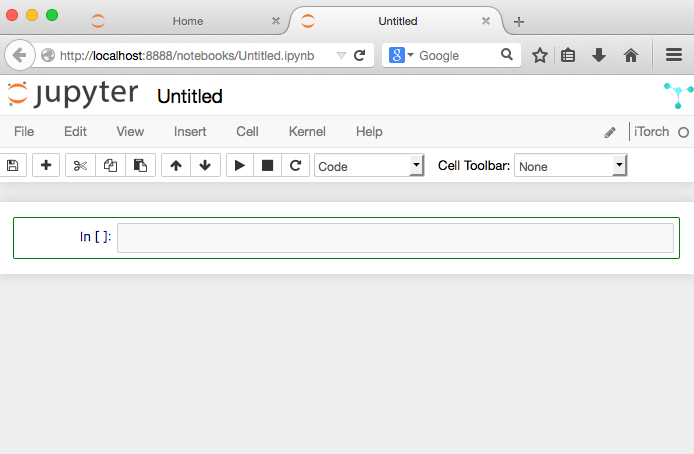

In [1]:
from IPython.display import Image
Image('../galleries/2015-Torch-Install-01.png', width=512)

## Package Install

Torch는 Lua에서 제공하는 Luarocks 라는 package 관리 시스템을 사용합니다.
따라서 필요한 모듈은 luarocks 명령을 통해서 간단하게 설치가 가능합니다.

자주 사용되는 옵션은

* list : 현재 설치된 패키지 리스트
* search : 설치할 패키지 찾기
* install : 패키지 설치
* remove : 패키지 삭제

아래는 image 라는 패키지가 설치되어 있는지 확인해보고 검색해서 설치하고 삭제 해보는 예제 입니다.

```
> luarocks list | grep image
> luarocks search image
> luarocks install image
> luarocks remove image
```